In [248]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

In [249]:
Dist = np.load("DistMatrix19.npy")

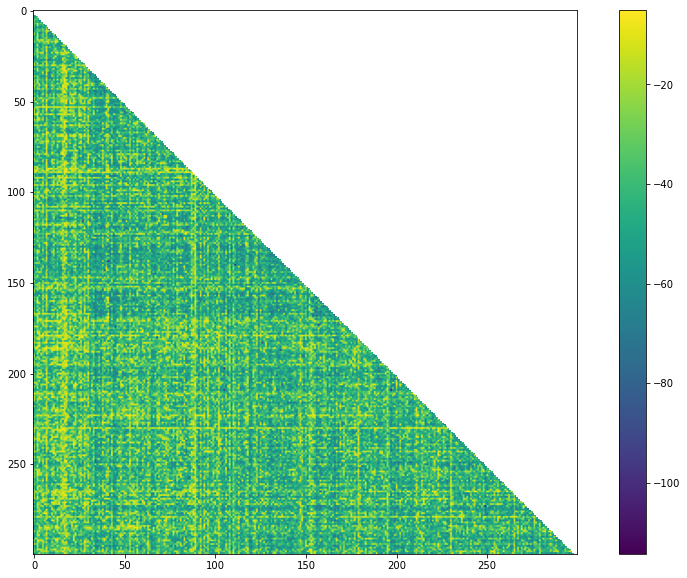

In [250]:
plt.imshow(Dist)
plt.colorbar()

In [152]:
NewDist = np.nan_to_num(Dist)
NewDist = NewDist + NewDist.T
np.fill_diagonal(NewDist,np.min(NewDist))

NewDist = NewDist + np.abs(np.min(NewDist))



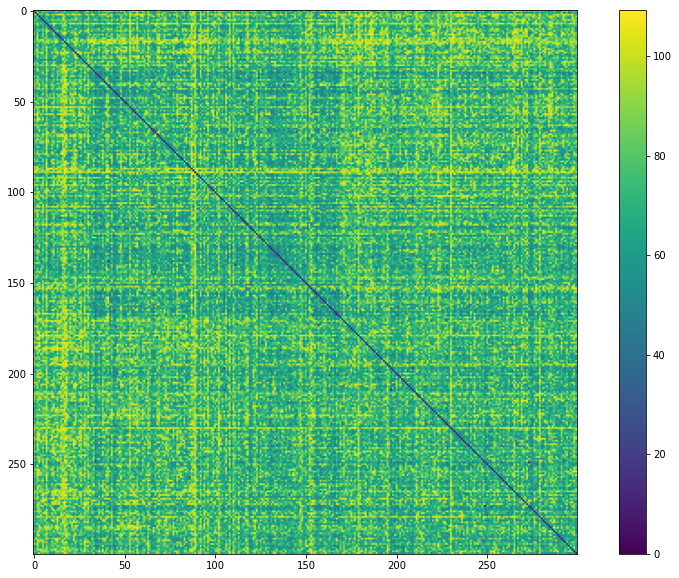

In [153]:
plt.imshow(NewDist)
plt.colorbar()

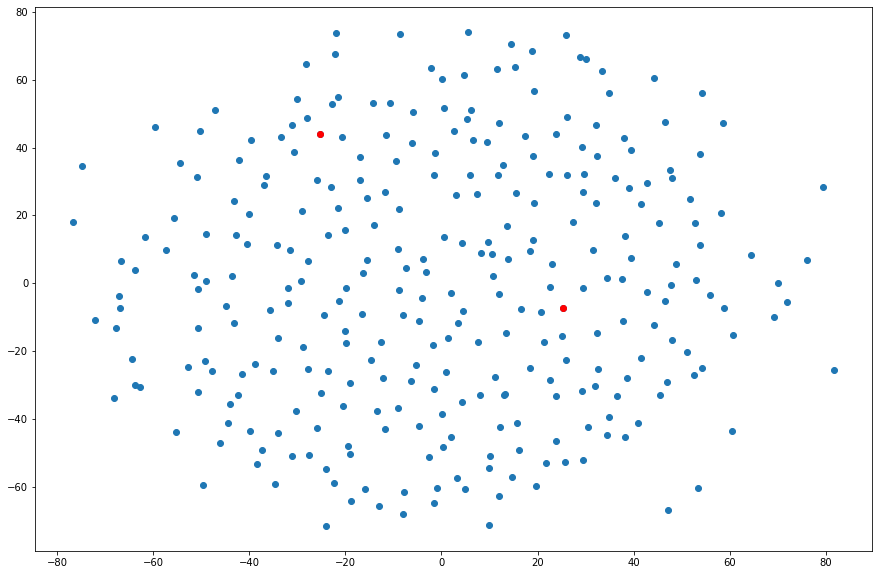

In [154]:
embedding = MDS(n_components=2,dissimilarity='precomputed',)
X = embedding.fit_transform(NewDist)
plt.scatter(X[:,0],X[:,1])

plt.scatter(X[47,0],X[47,1],color='r')
plt.scatter(X[59,0],X[59,1],color = 'r')



In [155]:
array([[209, 197],
       [273, 249],
       [138,  41],
       [197, 105],
       [140, 111],
       [209, 105]

SyntaxError: unexpected EOF while parsing (2985233148.py, line 6)

In [212]:
from sklearn.cluster import DBSCAN

In [213]:
db = DBSCAN(eps=10, min_samples=2,metric='precomputed')

In [214]:
X = db.fit_predict(NewDist)

In [215]:
np.count_nonzero(db.labels_!=-1)

9

In [216]:
labels = db.labels_

nbcluster = len(set(labels))- (1 if -1in labels else 0)
print(nbcluster)

4


In [234]:
np.sum(labels==4)

0

In [205]:
len(db.core_sample_indices_)

9

In [206]:
nbValues = 200
distList = np.linspace(1,100,nbValues)
nbClusterList = np.zeros(nbValues)
nbInCluster = np.zeros(nbValues)

nbCluster

for i in range(nbValues):
    dist = distList[i]
    db = DBSCAN(eps=dist, min_samples=2,metric='precomputed')
    X = db.fit_predict(NewDist)
    labels = db.labels_
    nbcluster = len(set(labels))- (1 if -1in labels else 0)
    nbClusterList[i] = nbcluster
    nbInCluster[i]= len(db.core_sample_indices_)

    
    

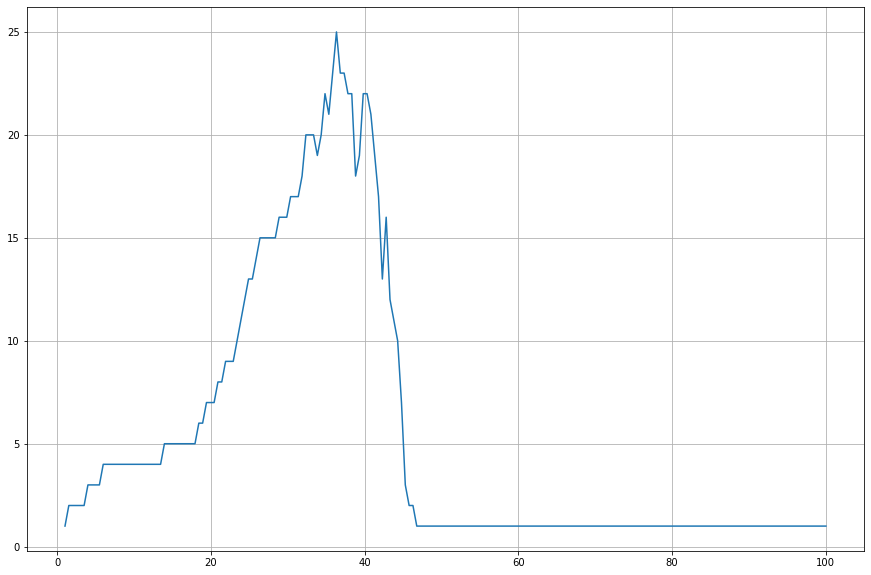

In [207]:
plt.plot(distList,nbClusterList)
plt.grid()


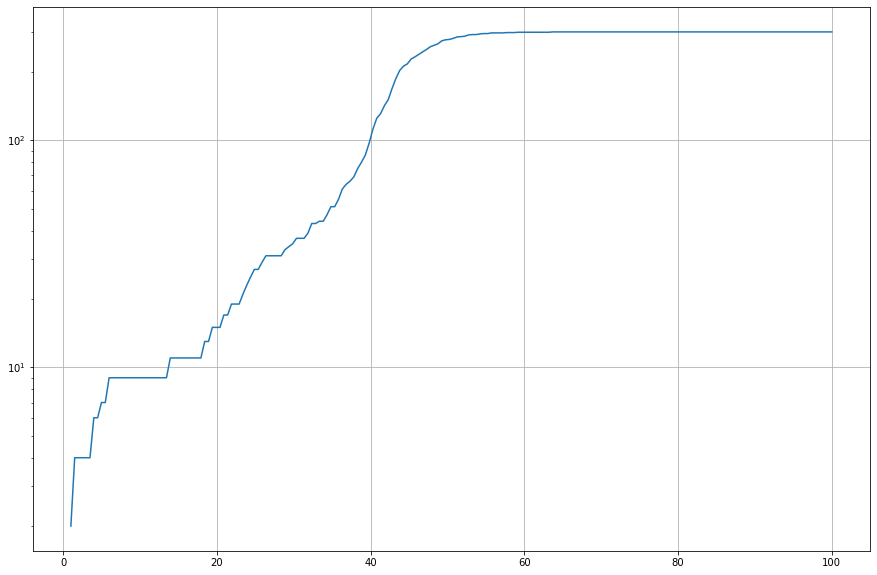

In [211]:
plt.plot(distList,nbInCluster)
plt.yscale("log")
plt.grid()

In [181]:
NewDist[209,197]

0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


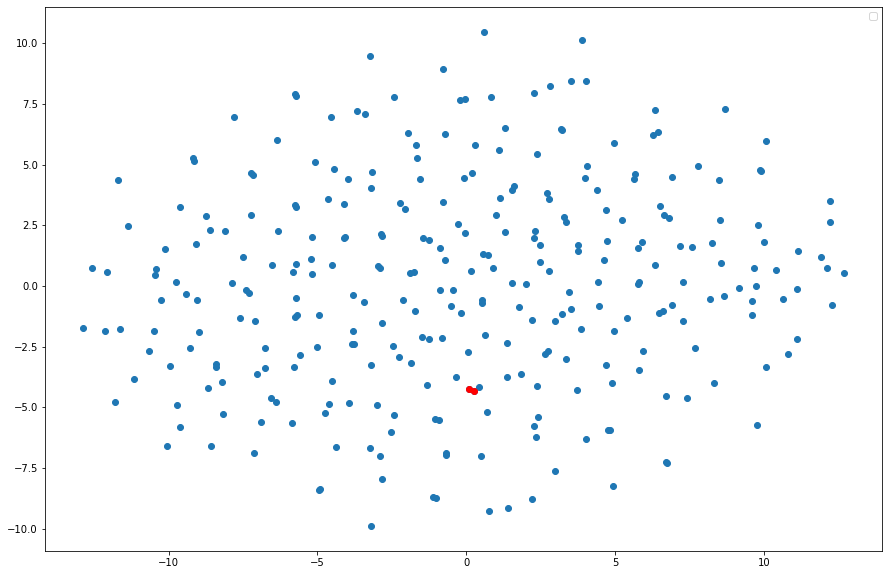

In [251]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2, learning_rate='auto',metric='precomputed', init='random',square_distances=True).fit_transform(NewDist)



plt.scatter(X[:,0],X[:,1])
plt.scatter(X[209,0],X[209,1],color='r')
plt.scatter(X[197,0],X[197,1],color = 'r')
plt.legend()